In [52]:
!pip install tensorflow
!pip install sklearn

- Tensor flow has 2 main components 
    - Graphs
    - Sessions
- When doing some computation it creates a graph of equations but doesn't evaluate it yet, e.g a node may be "3+2" Then a session allows part of the graph to be executed, it allocates memory and resource to handle the execution of the operations we've defined 


In [49]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [20]:
x = tf.Variable(324, tf.int16) #Rank 0
y = tf.Variable([324], tf.int16) #Rank 1
z = tf.Variable([[1,3],[2,3]], tf.int16) #Rank 2 
# Rank = deepest level of nesting

In [24]:
tensor1 = tf.ones([1,2,3])

In [28]:
t2 = tf.reshape(tensor1, [2, 3, 1])
t3 = tf.reshape(t2, [3, -1]) #-1 reshapes for us 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [32]:
#Evaluating tensors
with tf.compat.v1.Session() as sess:
    pass

In [43]:
t = tf.zeros([3, 3, 3, 3])
t = tf.reshape(t, [3, -1])

<tf.Tensor: shape=(3, 27), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

# Linear Regression


(0.0, 6.0, 0.0, 20.0)

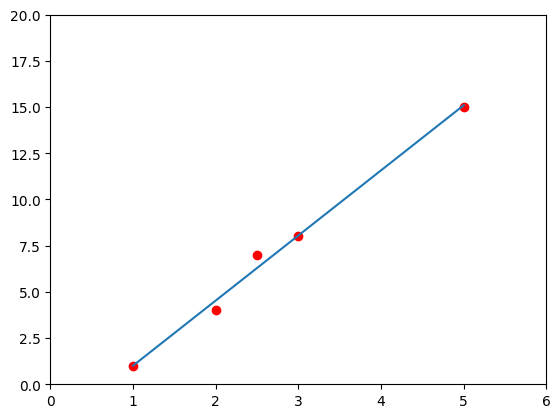

In [51]:
import numpy as np 

x = [1, 2, 2.5, 3, 5]
y = [1, 4, 7, 8, 15]
plt.plot(x, y, 'ro')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.axis([0, 6, 0, 20])

In [58]:

from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf 

In [114]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

dftrain
# dftrain['alone'].unique()


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...
622,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,female,19.0,0,0,30.0000,First,B,Southampton,y
625,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [118]:
CAT_COLS = ['sex', 'class', 'embark_town', 'deck', 'alone']
NUM_COLS = ['age', 'fare', 'parch', 'n_siblings_spouses']
feature_cols = [] 
for feature in CAT_COLS:
    vocab = dftrain[feature].unique()
    feature_cols.append(tf.feature_column.categorical_column_with_vocabulary_list(feature, vocab))
for feature in NUM_COLS:
    feature_cols.append(tf.feature_column.numeric_column(feature, dtype=tf.float32))


In [121]:
def make_input_fnc(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32): #Need to split data into batches, too big to process all at once 
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

train_input_fnc = make_input_fnc(dftrain, y_train)
test_input_fnc = make_input_fnc(dfeval, y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_cols)

linear_est.train(train_input_fnc)
result = linear_est.evaluate(test_input_fnc)

clear_output()
print(result)

{'accuracy': 0.7651515, 'accuracy_baseline': 0.625, 'auc': 0.8396694, 'auc_precision_recall': 0.7873041, 'average_loss': 0.47249624, 'label/mean': 0.375, 'loss': 0.45887482, 'precision': 0.69473684, 'prediction/mean': 0.35994658, 'recall': 0.6666667, 'global_step': 200}


In [141]:
result = list(linear_est.predict(test_input_fnc))
for idx, res in enumerate(result):
    print('='*30)
    print(f'Chance of survival: {res["probabilities"][1]}')
    print('\n'.join(f'{stat} = {val}' for stat, val in zip(list(dfeval), dfeval.loc[idx])))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\moham\AppData\Local\Temp\tmp5u84t2s2\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Chance of survival: 0.05801906809210777
sex = male
age = 35.0
n_siblings_spouses = 0
parch = 0
fare = 8.05
class = Third
deck = unknown
embark_town = Southampton
alone = y
Chance of survival: 0.2874722182750702
sex = male
age = 54.0
n_siblings_spouses = 0
parch = 0
fare = 51.8625
class = First
deck = E
embark_town = Southampton
alone = y
Chance of survival: 0.6287780404090881
sex = female
age = 58.0
n_siblings_spouses = 0
parch = 0
fare = 26.55
class = First
deck = C
embark_town = Southampton
alone = y
Chance of survival: 0.5278258323669434
sex = female
age = 55.0
n_siblings_spouses = 0
parch = 0
fare = 16.0
class = Second
deck = unknown
embark_town = Southampton
alone = y
Chance of survival: 0.

# Flower Classification


In [142]:
CSV_COL_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

In [145]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COL_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COL_NAMES, header=0)

In [147]:
train_y, test_y = train.pop('Species'), test.pop('Species')

In [164]:
def input_fnc(features, labels, training=True, batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    
    #shuffle and repeat
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

In [165]:
feature_cols = [tf.feature_column.numeric_column(key=key) for key in train.keys()]


In [170]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_cols,
    hidden_units=[30, 10],
    n_classes = 3
)

classifier.train(
    input_fn = lambda: input_fnc(train, train_y),
    steps=5000
)



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\moham\\AppData\\Local\\Temp\\tmpnavce3t5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorf

In [171]:
print(classifier.evaluate(input_fn=lambda: input_fnc(test, test_y, training=False)))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-11-10T21:34:32
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\moham\AppData\Local\Temp\tmpnavce3t5\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.50490s
INFO:tensorflow:Finished evaluation at 2022-11-10-21:34:33
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.53333336, average_loss = 0.7122182, global_step = 5000, loss = 0.7122182
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\moham\AppData\Local\Temp\tmpnavce3t5\model.ckpt-5000
{'accuracy': 0.53333336, 'average_loss': 0.7122182, 'loss': 0.7122182, 'global_step': 5000}


In [1]:
def pred_input_fn(features, batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = CSV_COL_NAMES[:-1]
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid: 
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: pred_input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))

NameError: name 'CSV_COL_NAMES' is not defined

# Clustering 
